# How Cashless Transactions are Impacting Spending Habits in India

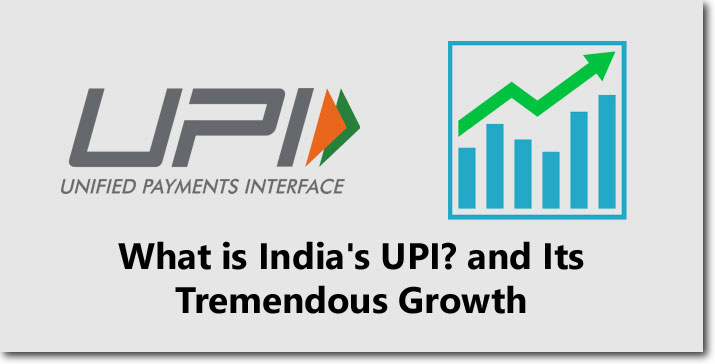

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Reading the CSV Data

In [3]:
df = pd.read_csv('UPI_India_Data.csv')

df

Month  No. of Banks live on UPI Volume (in Mn) Value (in Cr.)
0   Apr’24                       581      13,303.99   19,64,464.52
1   Mar'24                       572      13,440.00   19,78,353.23
2   Feb'24                       560      12,102.67   18,27,869.35
3   Jan'24                       550      12,203.02   18,41,083.97
4   Dec'23                       522      12,020.23   18,22,949.42
..     ...                       ...            ...            ...
91  Sep-16                        25           0.09          32.64
92  Aug-16                        21           0.09           3.09
93  Jul-16                        21           0.09           0.38
94  Jun-16                        21              0              0
95  May-16                        21              0              0

[96 rows x 4 columns]

Data Cleaning

In [4]:
df = df.dropna(subset=['Month'])
df = df[df['No. of Banks live on UPI'] != 0]

df

Month  No. of Banks live on UPI Volume (in Mn) Value (in Cr.)
0   Apr’24                       581      13,303.99   19,64,464.52
1   Mar'24                       572      13,440.00   19,78,353.23
2   Feb'24                       560      12,102.67   18,27,869.35
3   Jan'24                       550      12,203.02   18,41,083.97
4   Dec'23                       522      12,020.23   18,22,949.42
..     ...                       ...            ...            ...
91  Sep-16                        25           0.09          32.64
92  Aug-16                        21           0.09           3.09
93  Jul-16                        21           0.09           0.38
94  Jun-16                        21              0              0
95  May-16                        21              0              0

[96 rows x 4 columns]

This code cell drops any rows with missing values in the 'Month' column and removes rows where the 'No. of Banks live on UPI' column has a value of 0.

In [5]:
df.shape

(96, 4)

In [10]:
df.columns

Index(['Month', 'No. of Banks live on UPI', 'Volume (in Mn)',
       'Value (in Cr.)'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Month                       0
No. of Banks live on UPI    0
Volume (in Mn)              0
Value (in Cr.)              0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Month                     96 non-null     object
 1   No. of Banks live on UPI  96 non-null     int64 
 2   Volume (in Mn)            96 non-null     object
 3   Value (in Cr.)            96 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.1+ KB


In [12]:
df.describe()

No. of Banks live on UPI
count                 96.000000
mean                 213.333333
std                  154.671514
min                   21.000000
25%                  100.000000
50%                  154.000000
75%                  317.750000
max                  581.000000

In [13]:
df['Month']

0     Apr’24
1     Mar'24
2     Feb'24
3     Jan'24
4     Dec'23
       ...  
91    Sep-16
92    Aug-16
93    Jul-16
94    Jun-16
95    May-16
Name: Month, Length: 96, dtype: object

In [14]:
month_map = {
    'Jan': 'January',
    'Feb': 'February',
    'Mar': 'March',
    'Apr': 'April',
    'May': 'May',
    'Jun': 'June',
    'Jul': 'July',
    'Aug': 'August',
    'Sep': 'September',
    'Oct': 'October',
    'Nov': 'November',
    'Dec': 'December'
}

In [16]:
df['Month'] = df['Month'].apply(lambda x: x.replace("'", "-"))

df

Month  No. of Banks live on UPI Volume (in Mn) Value (in Cr.)
0   Apr’24                       581      13,303.99   19,64,464.52
1   Mar-24                       572      13,440.00   19,78,353.23
2   Feb-24                       560      12,102.67   18,27,869.35
3   Jan-24                       550      12,203.02   18,41,083.97
4   Dec-23                       522      12,020.23   18,22,949.42
..     ...                       ...            ...            ...
91  Sep-16                        25           0.09          32.64
92  Aug-16                        21           0.09           3.09
93  Jul-16                        21           0.09           0.38
94  Jun-16                        21              0              0
95  May-16                        21              0              0

[96 rows x 4 columns]

This code cell It replaces any single quotes (') with hyphens (-) and removes the hyphen between the month and year to make the data consistent.

In [17]:
df['Month']

0     Apr’24
1     Mar-24
2     Feb-24
3     Jan-24
4     Dec-23
       ...  
91    Sep-16
92    Aug-16
93    Jul-16
94    Jun-16
95    May-16
Name: Month, Length: 96, dtype: object

In [18]:
df['Month'] = df['Month'].str.replace('-', ' ')

df

Month  No. of Banks live on UPI Volume (in Mn) Value (in Cr.)
0   Apr’24                       581      13,303.99   19,64,464.52
1   Mar 24                       572      13,440.00   19,78,353.23
2   Feb 24                       560      12,102.67   18,27,869.35
3   Jan 24                       550      12,203.02   18,41,083.97
4   Dec 23                       522      12,020.23   18,22,949.42
..     ...                       ...            ...            ...
91  Sep 16                        25           0.09          32.64
92  Aug 16                        21           0.09           3.09
93  Jul 16                        21           0.09           0.38
94  Jun 16                        21              0              0
95  May 16                        21              0              0

[96 rows x 4 columns]

In [19]:
df.set_index('Month', inplace=True)

df

No. of Banks live on UPI Volume (in Mn) Value (in Cr.)
Month                                                         
Apr’24                       581      13,303.99   19,64,464.52
Mar 24                       572      13,440.00   19,78,353.23
Feb 24                       560      12,102.67   18,27,869.35
Jan 24                       550      12,203.02   18,41,083.97
Dec 23                       522      12,020.23   18,22,949.42
...                          ...            ...            ...
Sep 16                        25           0.09          32.64
Aug 16                        21           0.09           3.09
Jul 16                        21           0.09           0.38
Jun 16                        21              0              0
May 16                        21              0              0

[96 rows x 3 columns]

Sets the 'Month' column as the index of the dataframe using the set_index() function. This step allows for easier access and indexing of data based on the month.

Data Visualization Start

In [21]:
import matplotlib.pyplot as plt

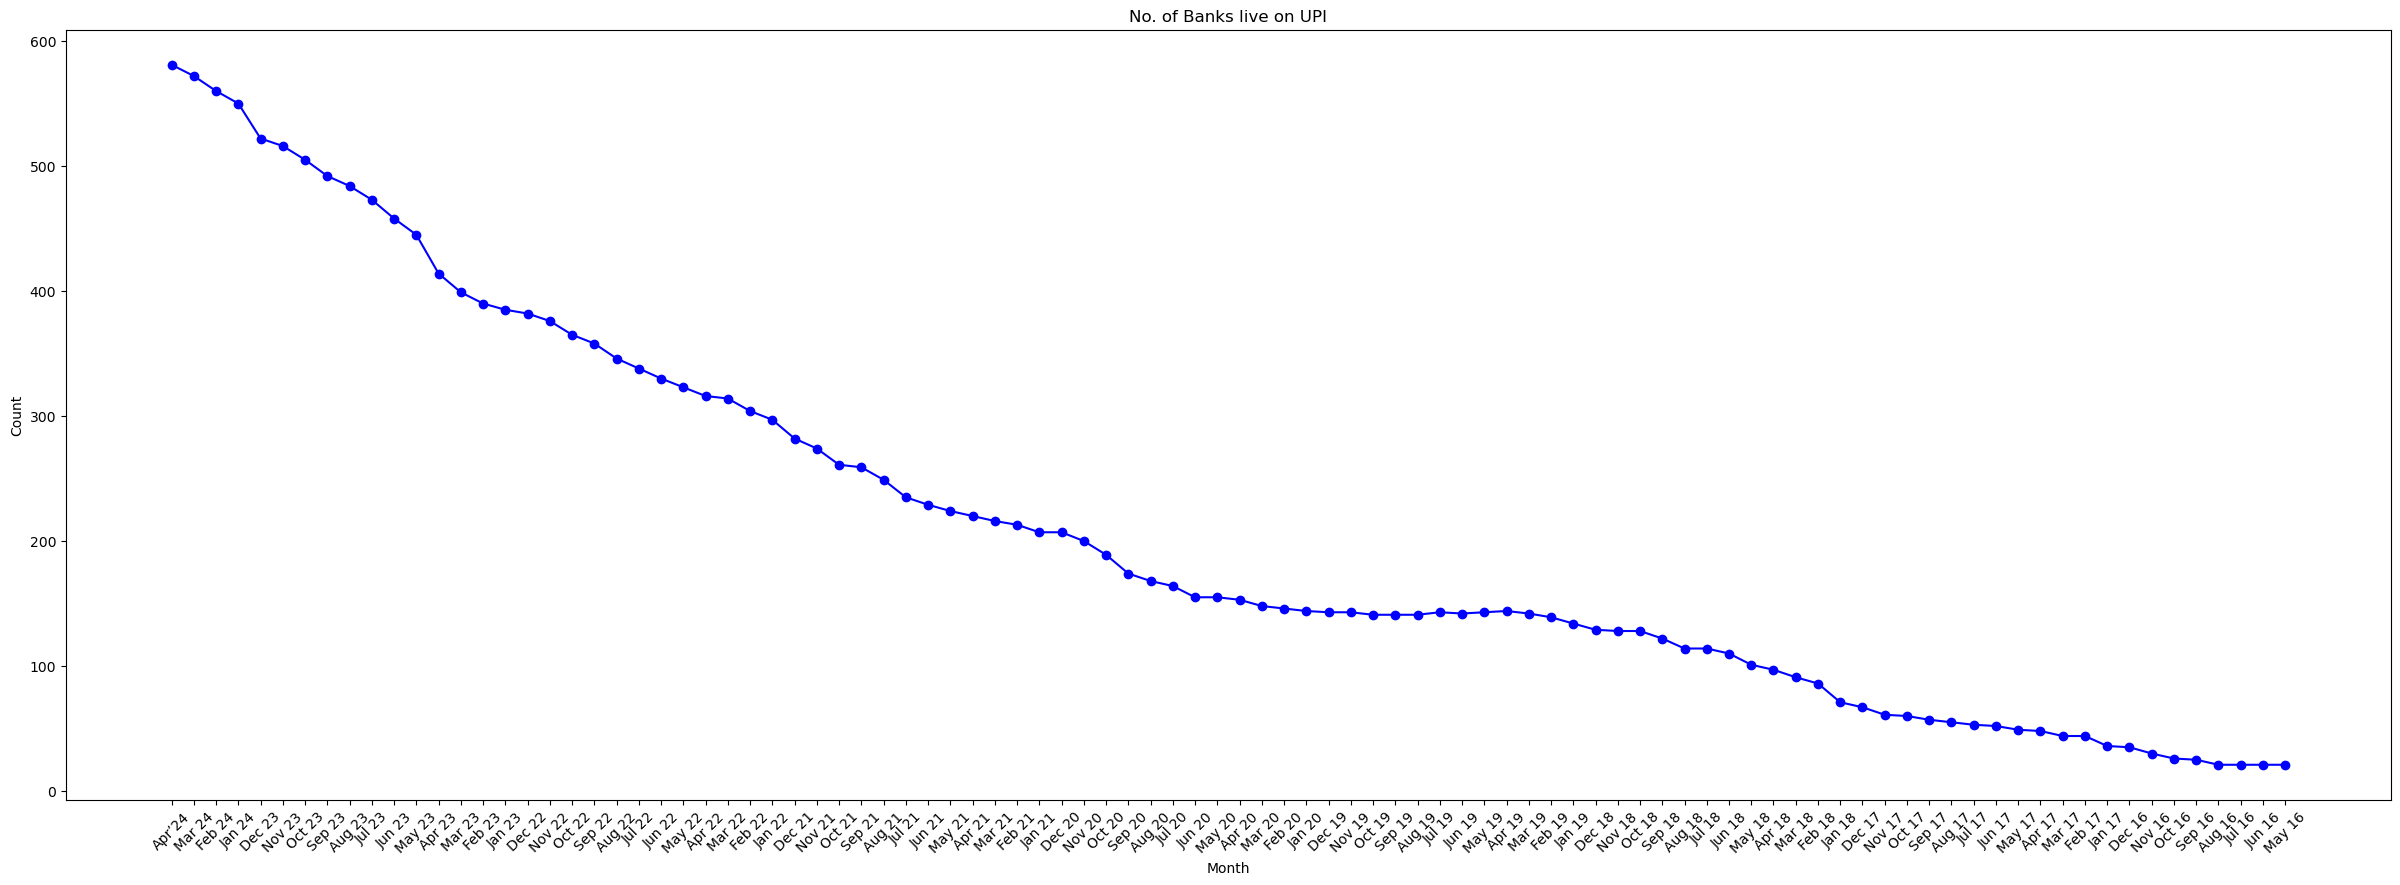

In [36]:
plt.figure(figsize=(30, 10))
plt.plot(df.index, df['No. of Banks live on UPI'], marker='o', color='b')
plt.title('No. of Banks live on UPI')
plt.xticks(rotation = 45)
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [28]:
import plotly.graph_objects as go

In [31]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['No. of Banks live on UPI'], mode='lines+markers', name='No. of Banks live on UPI'))
fig.update_layout(title='No. of Banks live on UPI', xaxis_title='Month', yaxis_title='Count')
fig.show()

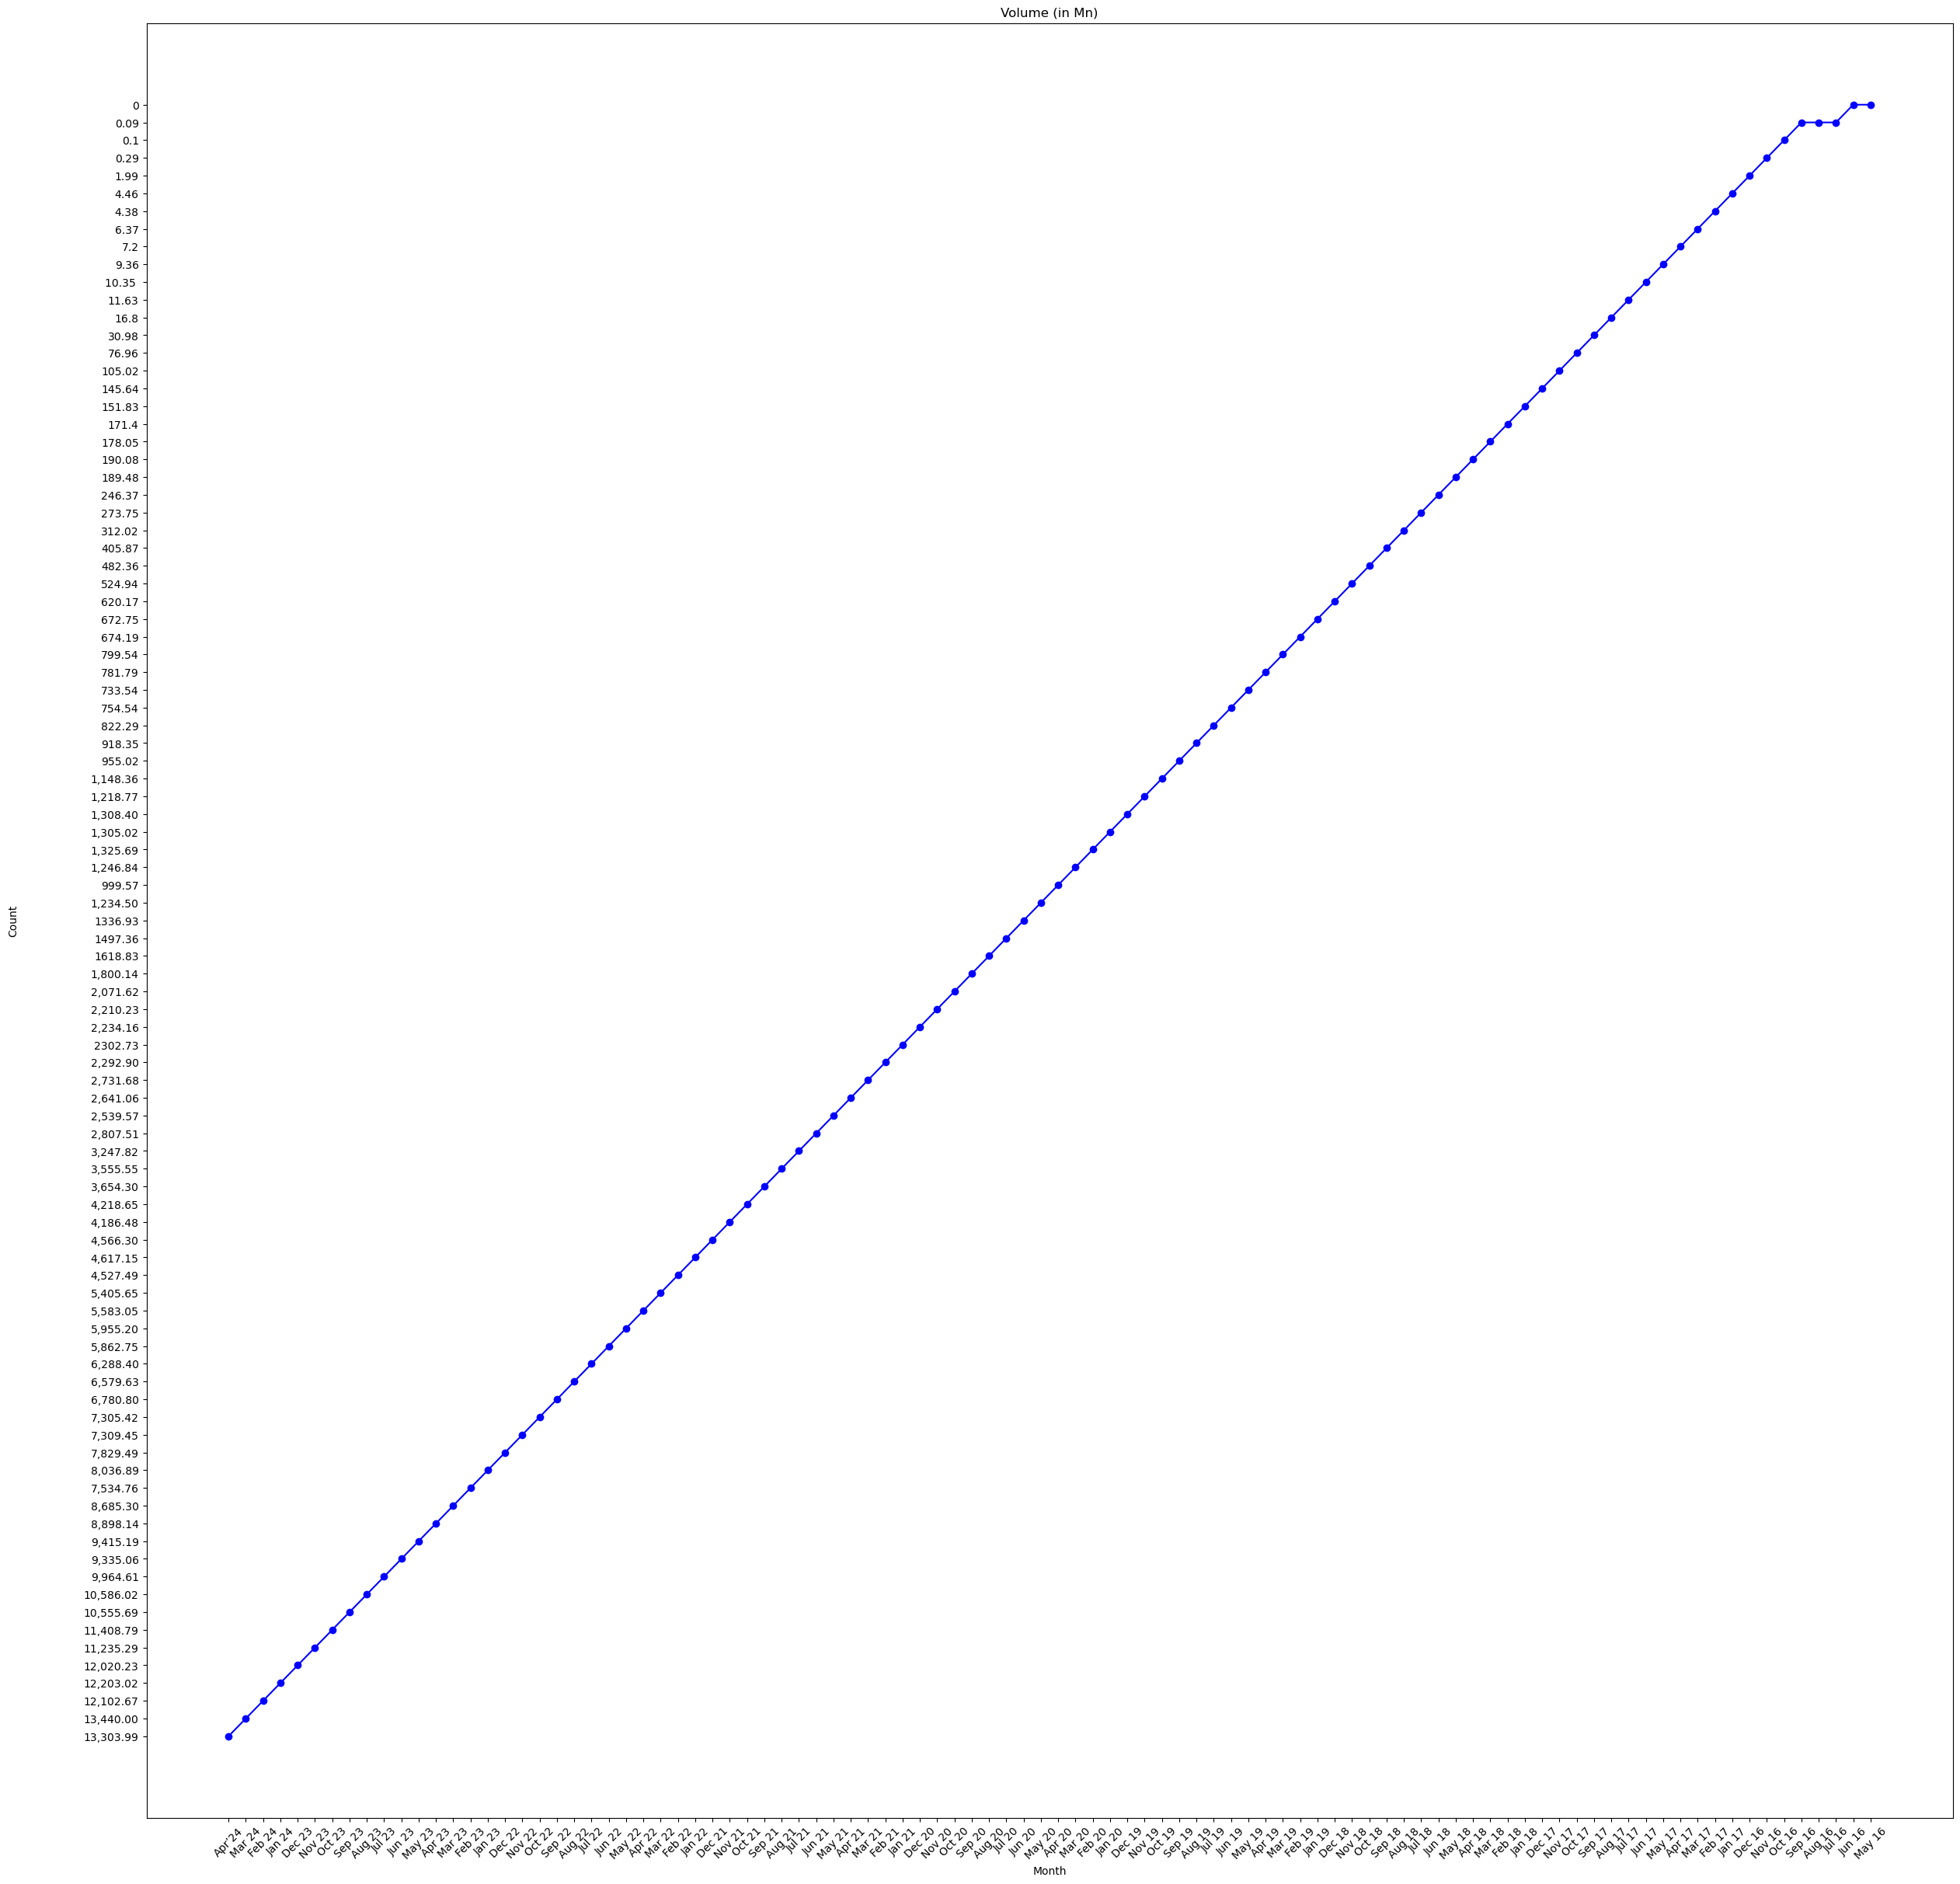

In [33]:
plt.figure(figsize=(30, 30))
plt.plot(df.index, df['Volume (in Mn)'], marker='o', color='b')
plt.title('Volume (in Mn)')
plt.xticks(rotation = 45)
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Volume (in Mn)'], mode='lines+markers', name='Volume (in Mn)'))
fig.update_layout(title='Volume (in Mn)', xaxis_title='Month', yaxis_title='Count')
fig.show()

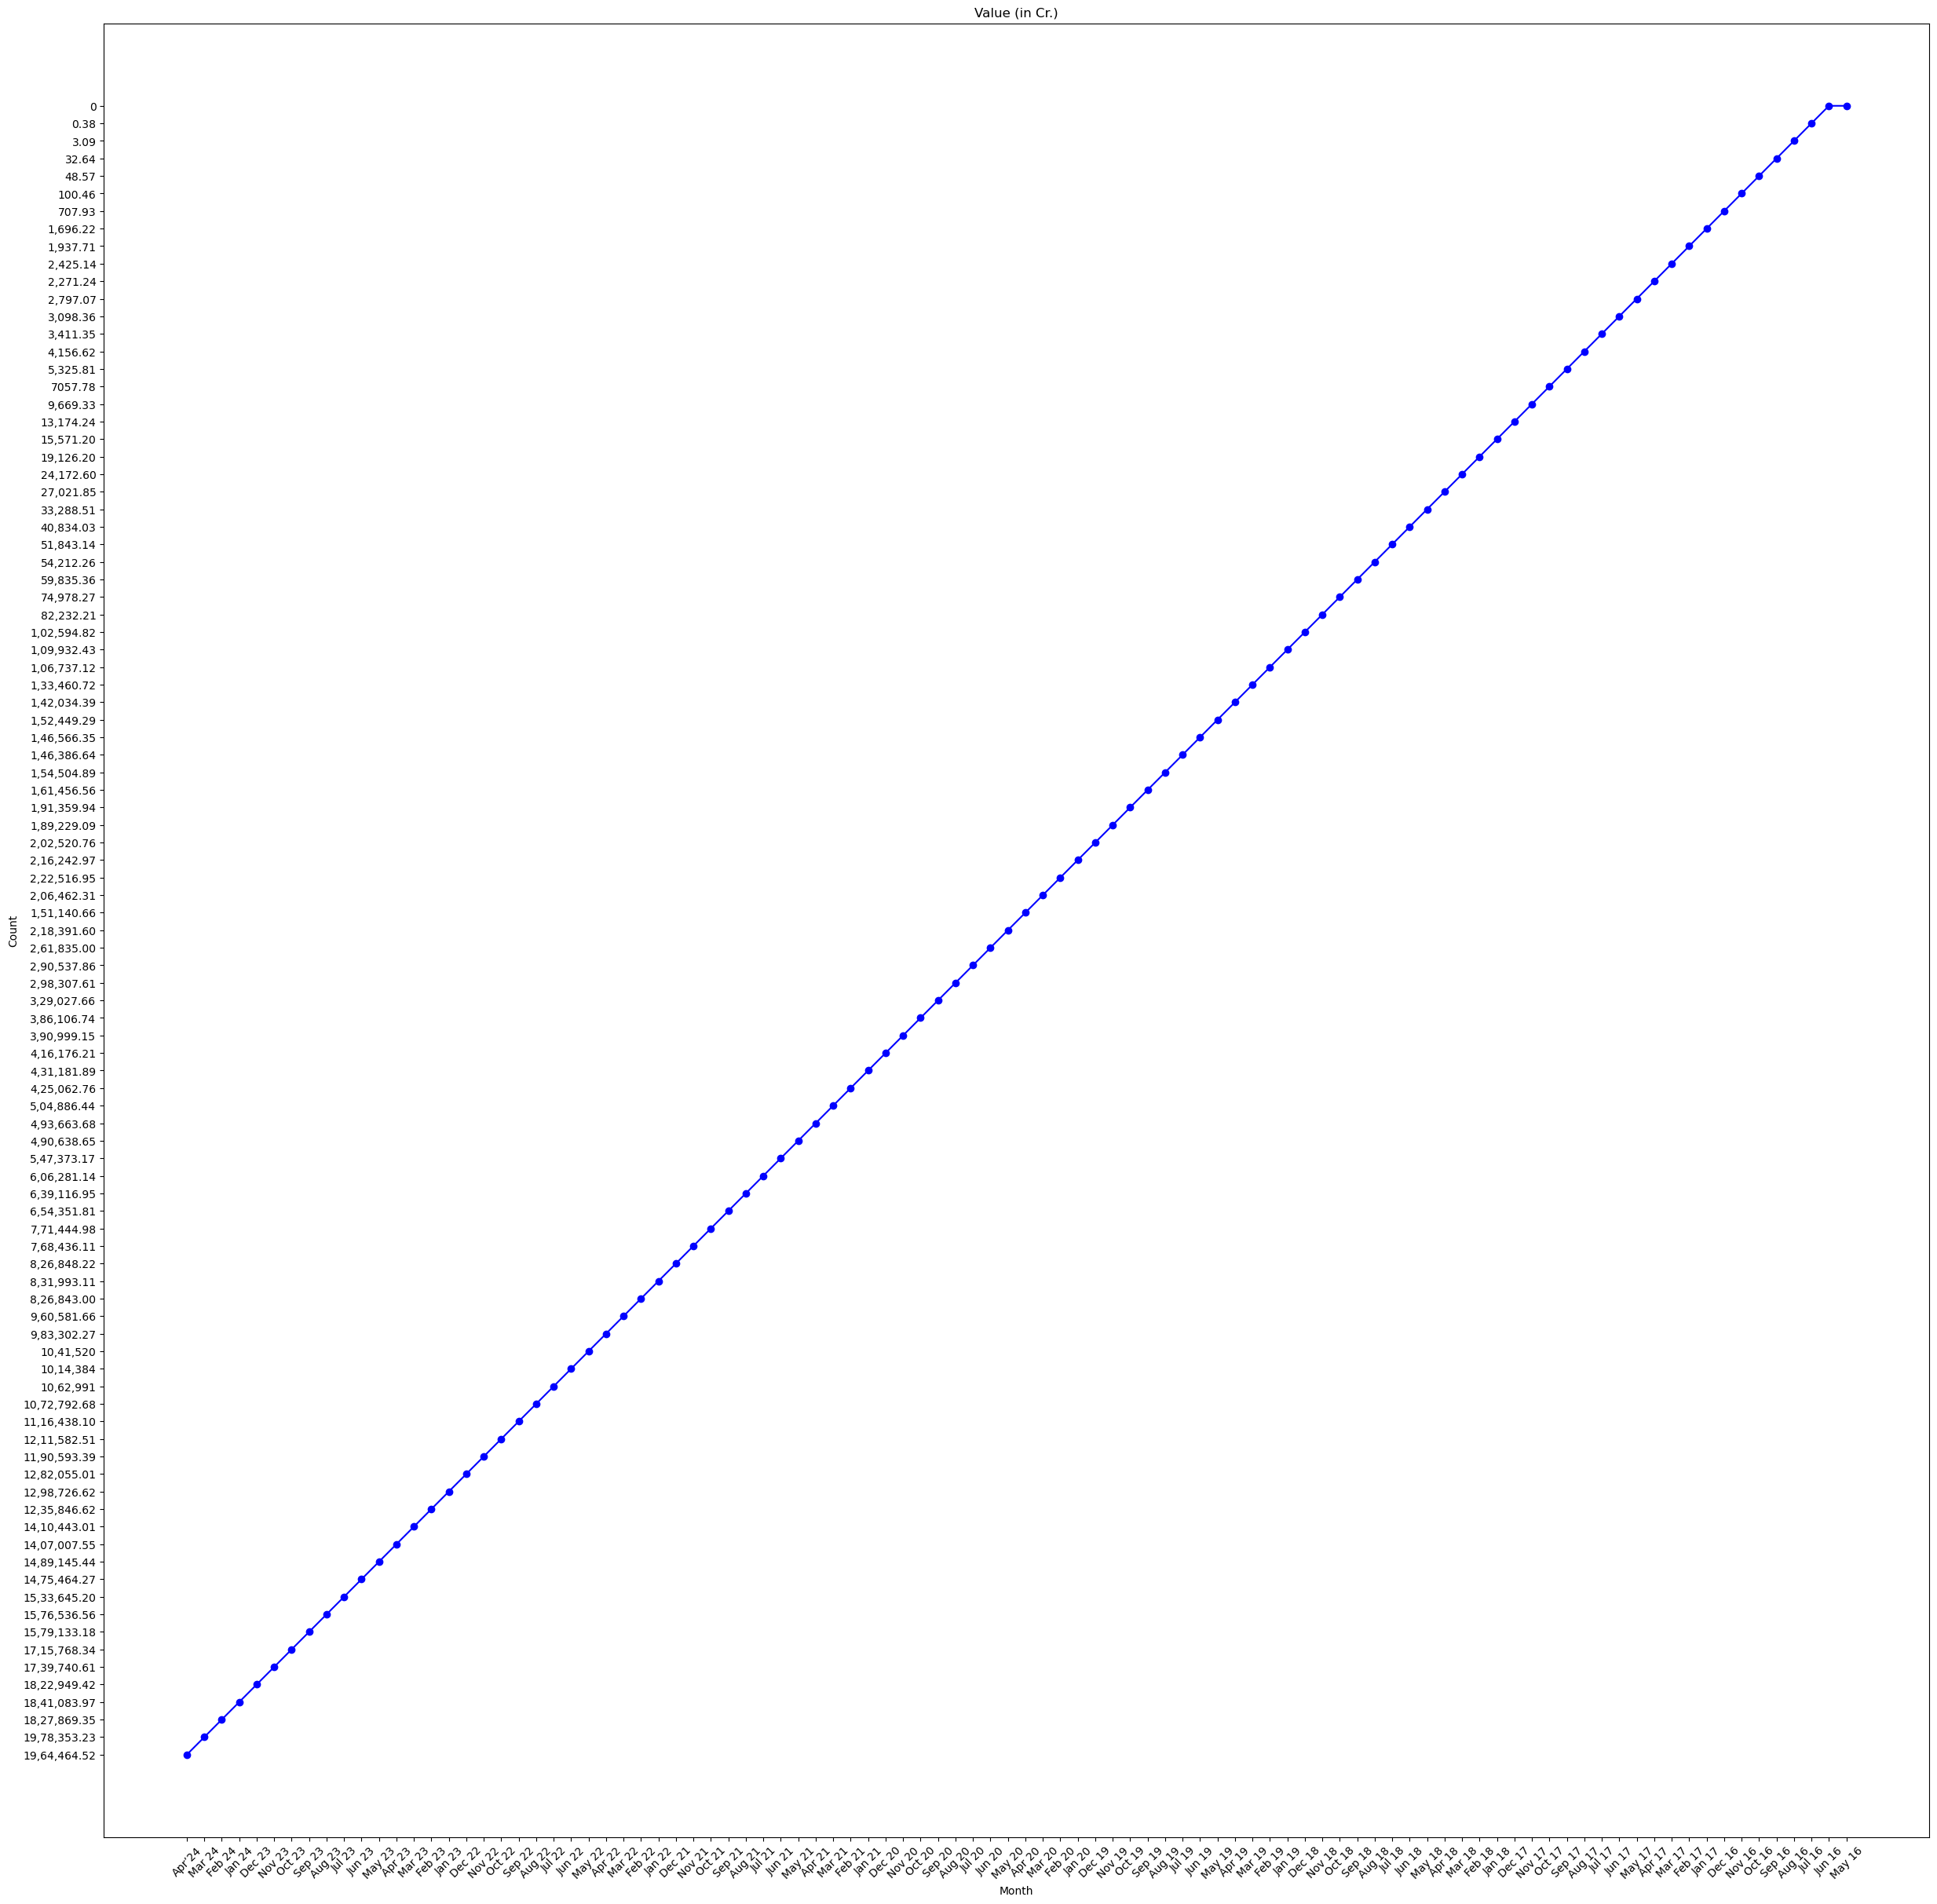

In [37]:
plt.figure(figsize=(30, 30))
plt.plot(df.index, df['Value (in Cr.)'], marker='o', color='b')
plt.title('Value (in Cr.)')
plt.xticks(rotation = 45)
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [38]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Value (in Cr.)'], mode='lines+markers', name='Value (in Cr.)'))
fig.update_layout(title='Value (in Cr.)', xaxis_title='Month', yaxis_title='Count')
fig.show()

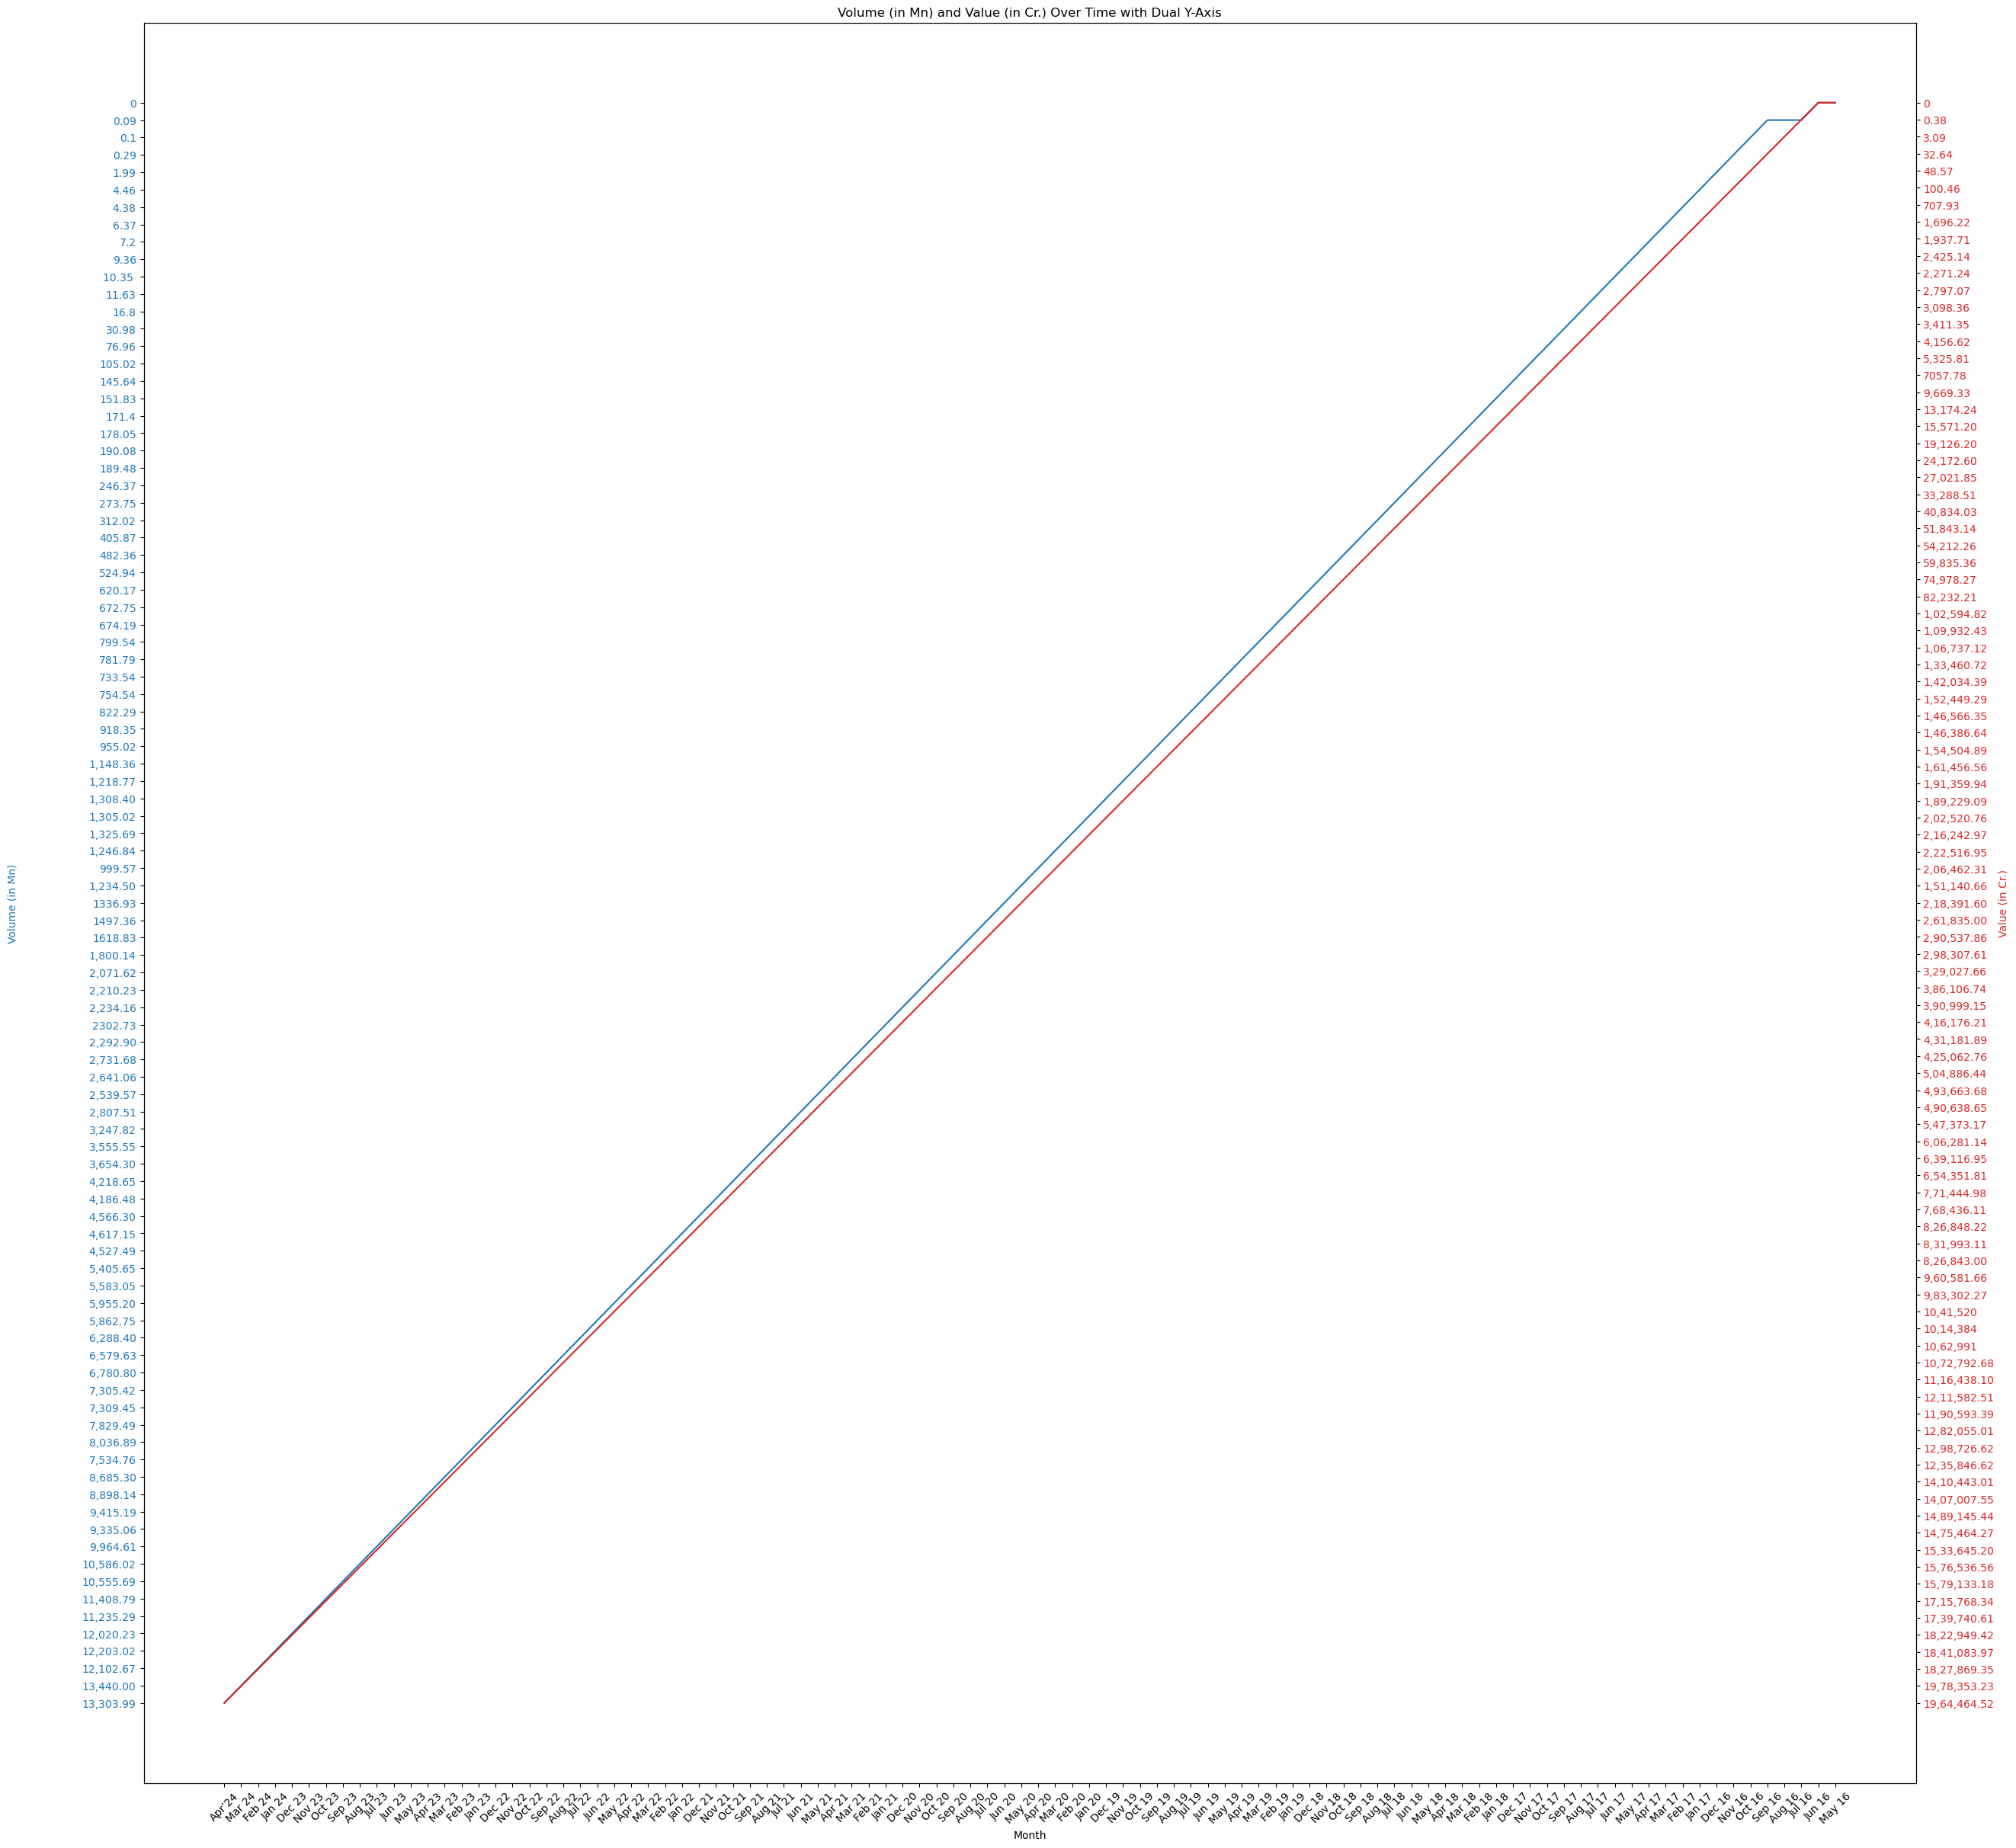

In [59]:
fig, ax1 = plt.subplots(figsize=(30, 30))

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Volume (in Mn)', color=color)
ax1.plot(df.index, df['Volume (in Mn)'], color=color)
plt.xticks(rotation=45)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Value (in Cr.)', color=color)
ax2.plot(df.index, df['Value (in Cr.)'], color=color)
plt.xticks(rotation=45)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Volume (in Mn) and Value (in Cr.) Over Time with Dual Y-Axis')
plt.xticks(rotation=45)
plt.show()

In [42]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Volume (in Mn)'], mode='lines', name='Volume (in Mn)', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df.index, y=df['Value (in Cr.)'], mode='lines', name='Value (in Cr.)', line=dict(color='red')))

fig.update_layout(
    title='Volume (in Mn) and Value (in Cr.) Over Time with Dual Y-Axis',
    xaxis=dict(title='Month', tickangle=45),
    yaxis=dict(title='Volume (in Mn)', color='blue'),
    yaxis2=dict(title='Value (in Cr.)', color='red', overlaying='y', side='right'),
    legend=dict(x=0, y=1.1, orientation='h'),
    margin=dict(l=50, r=50, t=100, b=50),
    height=600,
    width=1200
)

fig.show()

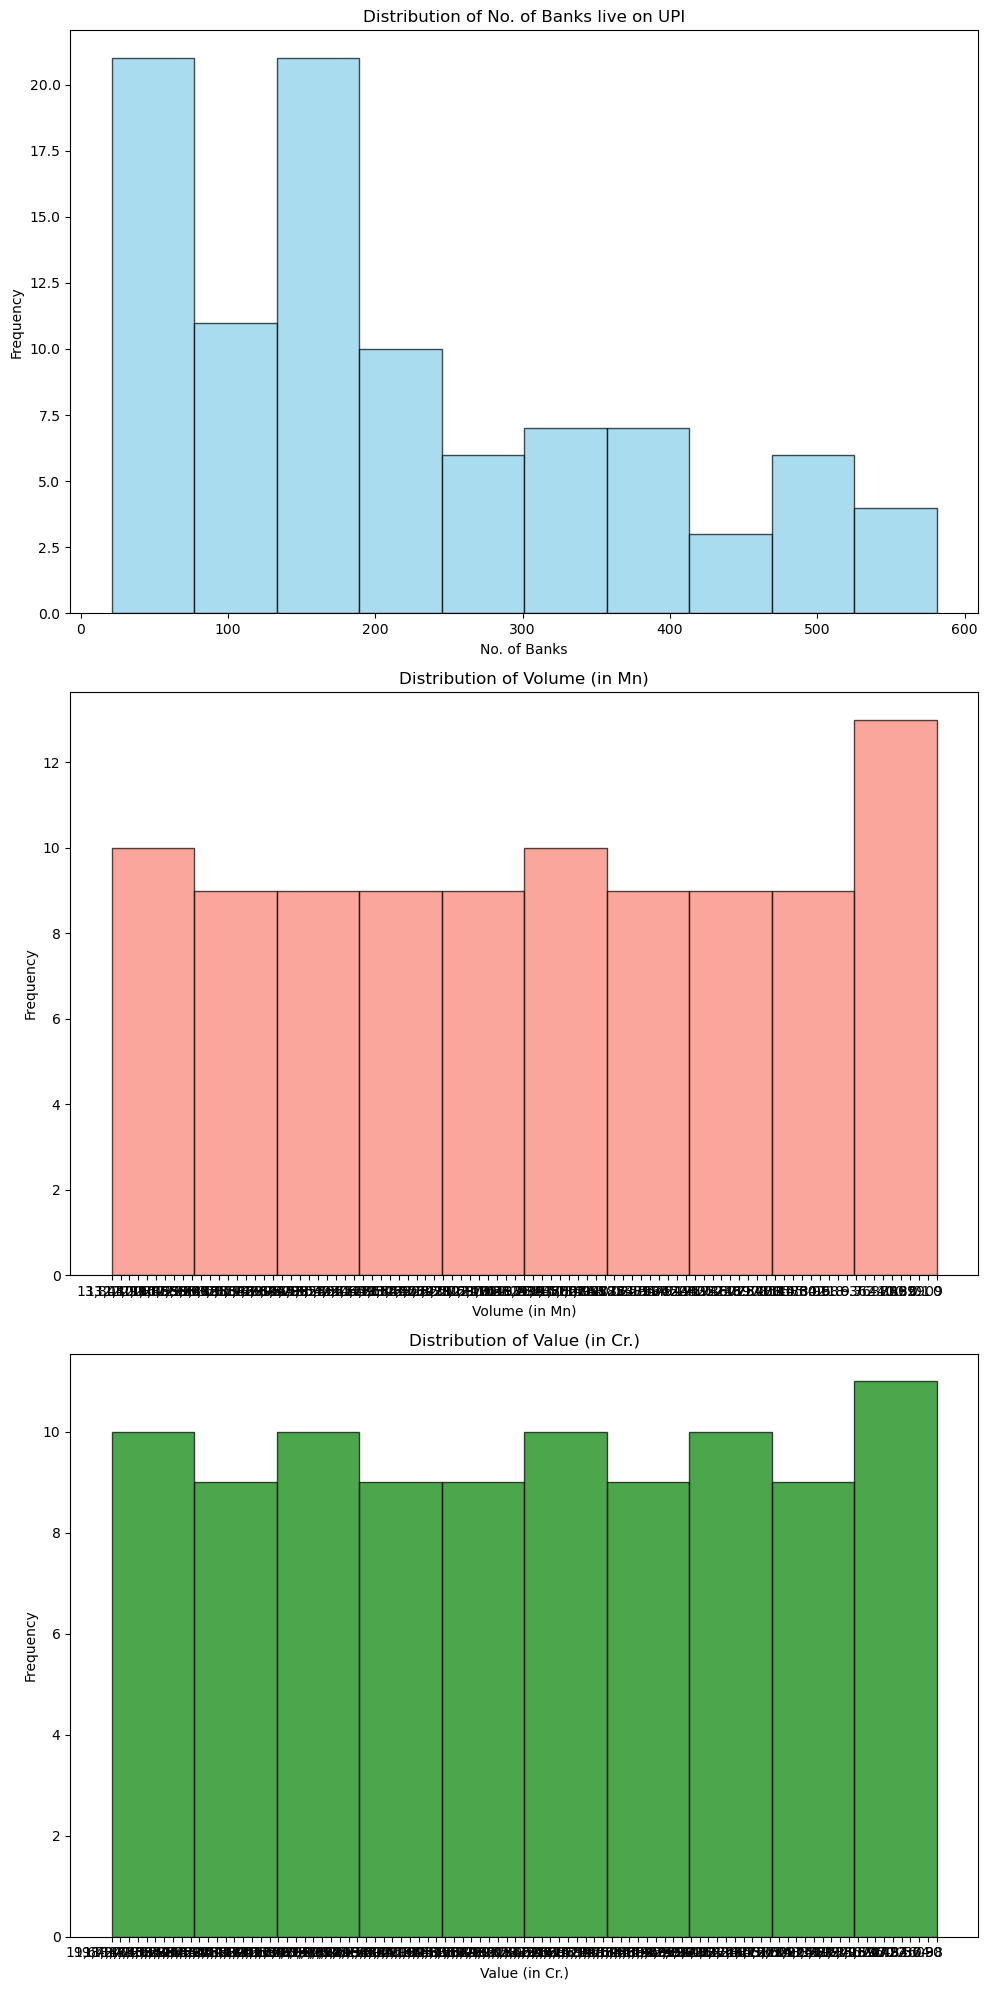

In [57]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

axes[0].hist(df['No. of Banks live on UPI'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of No. of Banks live on UPI')
axes[0].set_xlabel('No. of Banks')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['Volume (in Mn)'], bins=10, color='salmon', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Volume (in Mn)')
axes[1].set_xlabel('Volume (in Mn)')
axes[1].set_ylabel('Frequency')

axes[2].hist(df['Value (in Cr.)'], bins=10, color='green', edgecolor='black', alpha=0.7)
axes[2].set_title('Distribution of Value (in Cr.)')
axes[2].set_xlabel('Value (in Cr.)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [58]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df.index,
    y=df['No. of Banks live on UPI'],
    name='No. of Banks live on UPI',
    marker_color='green'
))

fig.update_layout(
    title='Number of Banks Live on UPI Over Time',
    xaxis=dict(title='Month', tickangle=45),
    yaxis=dict(title='Count'),
    legend=dict(x=0, y=1.1, orientation='h'),
    margin=dict(l=50, r=50, t=100, b=50),
    height=600,
    width=1200
)

fig.show()

From this graph, we can see that in the year 2016, only 35 Banks were live on UPI, and over the years this graph went high on high. This year in Apr 2024 we can see that 561 banks are live on UPI. This is the insane growth of UPI in India.

The line plots generated in the document show the increasing trend of banks live on UPI over time. This indicates a growing adoption of cashless transactions in India. The upward trend suggests that more banks are joining the UPI platform, providing users with more options for cashless transactions. This increase in the availability of UPI services may have a direct impact on spending habits by promoting the use of digital payments over cash.